# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API Key
from api_keys import weather_api_key

# Incorporated Citipy to Determine City Based on Latitude & Longitude
from citipy import citipy

# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [5]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
index_counter = 0
set_counter = 1


# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        if index_counter > 500:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 : cape town
Processing Record 2 of Set 1 : mushie
Processing Record 3 of Set 1 : kayerkan
Processing Record 4 of Set 1 : mar del plata
Processing Record 5 of Set 1 : bambous virieux
City not found. Skipping...
Processing Record 6 of Set 1 : pauini
Processing Record 7 of Set 1 : hithadhoo
Processing Record 8 of Set 1 : inongo
Processing Record 9 of Set 1 : ushuaia
Processing Record 10 of Set 1 : castro
Processing Record 11 of Set 1 : leningradskiy
Processing Record 12 of Set 1 : ribeira grande
Processing Record 13 of Set 1 : chuy
Processing Record 14 of Set 1 : vaini
Processing Record 15 of Set 1 : rikitea
Processing Record 16 of Set 1 : isiro
Processing Record 17 of Set 1 : ribeira brava
Processing Record 18 of Set 1 : puerto ayora
Processing Record 19 of Set 1 : korla
Processing Record 20 of Set 1 : qasigiannguit
Processing Record 21 of Set 1 : albany
Processing Record 22 of Set 1 : zaragoza
City not

Processing Record 181 of Set 1 : wajir
Processing Record 182 of Set 1 : souillac
Processing Record 183 of Set 1 : simoes
Processing Record 184 of Set 1 : kuching
Processing Record 185 of Set 1 : saint-augustin
Processing Record 186 of Set 1 : pedraza
Processing Record 187 of Set 1 : alappuzha
Processing Record 188 of Set 1 : paamiut
Processing Record 189 of Set 1 : ampanihy
Processing Record 190 of Set 1 : berlevag
Processing Record 191 of Set 1 : pacifica
Processing Record 192 of Set 1 : dingle
Processing Record 193 of Set 1 : port hawkesbury
Processing Record 194 of Set 1 : adrar
Processing Record 195 of Set 1 : hinjilikatu
Processing Record 196 of Set 1 : hamilton
Processing Record 197 of Set 1 : juneau
Processing Record 198 of Set 1 : hasaki
Processing Record 199 of Set 1 : bo rai
Processing Record 200 of Set 1 : lebu
City not found. Skipping...
Processing Record 201 of Set 1 : luhyny
Processing Record 202 of Set 1 : arraial do cabo
Processing Record 203 of Set 1 : henties bay
Proc

Processing Record 365 of Set 1 : varhaug
Processing Record 366 of Set 1 : merzifon
Processing Record 367 of Set 1 : culpeper
Processing Record 368 of Set 1 : vestmanna
Processing Record 369 of Set 1 : antofagasta
City not found. Skipping...
Processing Record 370 of Set 1 : baruun-urt
Processing Record 371 of Set 1 : broome
Processing Record 372 of Set 1 : nikolayevka
Processing Record 373 of Set 1 : cabo san lucas
Processing Record 374 of Set 1 : port hedland
Processing Record 375 of Set 1 : douentza
Processing Record 376 of Set 1 : zhigalovo
City not found. Skipping...
Processing Record 377 of Set 1 : wanning
Processing Record 378 of Set 1 : mangrol
Processing Record 379 of Set 1 : sao gabriel da cachoeira
Processing Record 380 of Set 1 : tutoia
Processing Record 381 of Set 1 : nuuk
Processing Record 382 of Set 1 : burgersdorp
City not found. Skipping...
Processing Record 383 of Set 1 : merauke
Processing Record 384 of Set 1 : collie
Processing Record 385 of Set 1 : birin
Processing R

Processing Record 47 of Set 2 : avera
Processing Record 48 of Set 2 : bereznik
Processing Record 49 of Set 2 : hokitika
Processing Record 50 of Set 2 : saint-pierre
Processing Record 51 of Set 2 : lamar
Processing Record 52 of Set 2 : magadan
Processing Record 53 of Set 2 : cuamba
Processing Record 54 of Set 2 : yar-sale
Processing Record 55 of Set 2 : sylling
Processing Record 56 of Set 2 : ngunguru
Processing Record 57 of Set 2 : taltal
Processing Record 58 of Set 2 : ust-nera
Processing Record 59 of Set 2 : itarema
Processing Record 60 of Set 2 : izumo
Processing Record 61 of Set 2 : sitka
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
 # Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date
}

In [13]:
weather_data = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_data.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Cape Town,ZA,-33.93,18.42,55.99,62,75,20.80,1601526849
1,Mushie,CD,-3.02,16.90,71.73,94,100,2.37,1601527074
2,Kayerkan,RU,69.35,87.76,28.40,100,75,13.42,1601527075
3,Mar del Plata,AR,-38.00,-57.56,55.00,81,62,9.17,1601527075
4,Bambous Virieux,MU,-20.34,57.76,75.99,78,20,6.93,1601527075
5,Pauini,BR,-7.71,-66.98,70.92,98,100,1.50,1601527076
6,Hithadhoo,MV,-0.60,73.08,82.87,71,99,3.51,1601527076
7,Inongo,CD,-1.95,18.27,69.78,94,99,5.06,1601527076
8,Ushuaia,AR,-54.80,-68.30,28.40,100,100,20.80,1601527077
9,Castro,BR,-24.79,-50.01,63.81,94,29,7.07,1601527077


In [15]:
# Exporting the city data into a csv

weather_data.to_csv("city_df.csv")


In [16]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.235542,15.290018,63.446039,72.321492,52.673179,7.989165,1.601527e+09
std,33.977562,90.254395,16.204571,19.659685,38.802398,5.263651,9.007133e+01
min,-54.800000,-175.200000,10.990000,9.000000,0.000000,0.340000,1.601526e+09
25%,-8.800000,-64.850000,52.000000,61.000000,12.000000,3.990000,1.601527e+09
50%,21.110000,18.270000,64.400000,76.000000,61.000000,6.710000,1.601527e+09
75%,48.895000,88.965000,76.625000,87.500000,90.000000,11.410000,1.601527e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,25.280000,1.601527e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
clean_data = weather_data.loc[weather_data['Humidity']<100]

In [50]:
clean_data.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Cape Town,ZA,-33.93,18.42,55.99,62,75,20.80,1601526849
1,Mushie,CD,-3.02,16.90,71.73,94,100,2.37,1601527074
3,Mar del Plata,AR,-38.00,-57.56,55.00,81,62,9.17,1601527075
4,Bambous Virieux,MU,-20.34,57.76,75.99,78,20,6.93,1601527075
5,Pauini,BR,-7.71,-66.98,70.92,98,100,1.50,1601527076


In [51]:
# Exporting the updated data into a csv

clean_data.to_csv("clean_data.csv")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The latitude or location of the equator greatly affects the maximum temperature at each area. The closer the cities are to the equator, the hotter it gets. 


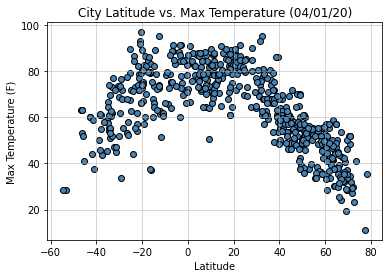

In [68]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

#Graph labels
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")
print("The latitude or location of the equator greatly affects the maximum temperature at each area. The closer the cities are to the equator, the hotter it gets. ")


## Latitude vs. Humidity Plot

While it appears to be humidity everywhere regardless of whether it's closer to the equator or not, it does show that where the equator lies (0) humidity is really high. It's never low unless it's a little farther from 0. 


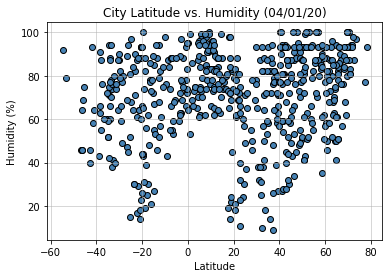

In [69]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

#Data labels
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")
print("While it appears to be humidity everywhere regardless of whether it's closer to the equator or not, it does show that where the equator lies (0) humidity is really high. It's never low unless it's a little farther from 0. ")

## Latitude vs. Cloudiness Plot

Latitude has no effect or any form of relationship with a regions' cloudiness.  


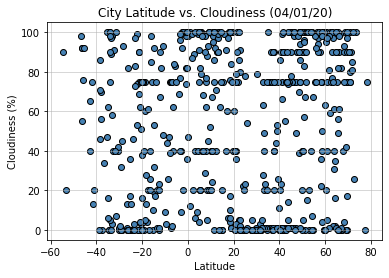

In [71]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

#Data labels
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")
print("Latitude has no effect or any form of relationship with a regions' cloudiness.  ")

## Latitude vs. Wind Speed Plot

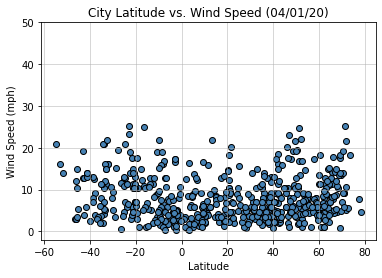

In [37]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (04/01/20)")

# Data Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")
print("Just like Cloudiness, Wind speed isn't affected by the latitudes. The only thing clear from the scatter plot is that wind speed doesn't exceed 40mph ")

## Linear Regression

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [39]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong negative correlation between latitude and max temperature for northern hemisphere. As the latitude moves away from 0, it drops from max temperature hence a negative correlation.


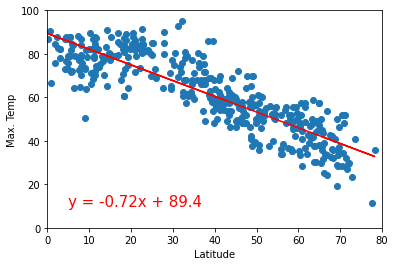

In [73]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LAT.png")
print("There is a strong negative correlation between latitude and max temperature for northern hemisphere. As the latitude moves away from 0, it drops from max temperature hence a negative correlation.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a moderate positive correlation between latitude and max temperature for southern hemisphere. As it gets closer to the equator, the max temp increases.


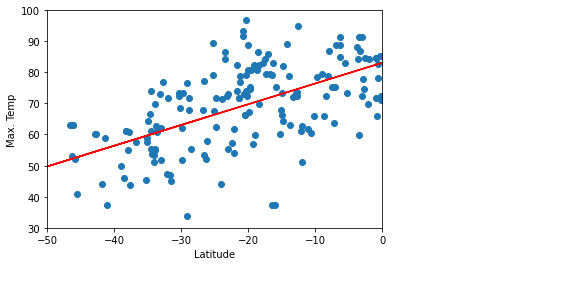

In [74]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim (-50, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LAT.png")
print("There is a moderate positive correlation between latitude and max temperature for southern hemisphere. As it gets closer to the equator, the max temp increases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Still a positive correlation between the latitude and humidity in the Northern Hemisphere.


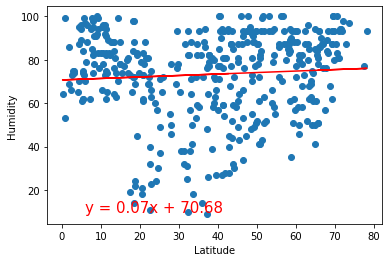

In [80]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUMIDITY VS LAT.png")
print("Still a positive correlation between the latitude and humidity in the Northern Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is a moderate positive correlation between latitude and humidity for southern hemisphere.


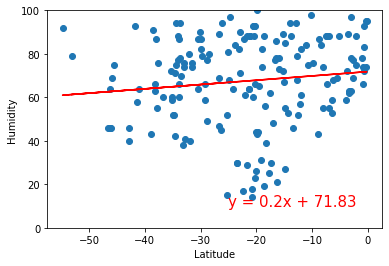

In [79]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUMIDITY VS LAT.png")
print("There is a moderate positive correlation between latitude and humidity for southern hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

A weak positive correlation between latitude and cloudiness for northern hemisphere.


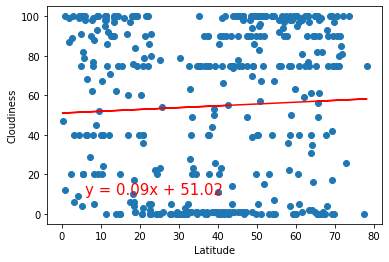

In [78]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUDS VS LAT.png")
print("A weak positive correlation between latitude and cloudiness for northern hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

A weak positive correlation between latitude and cloudiness in the southern hemisphere.


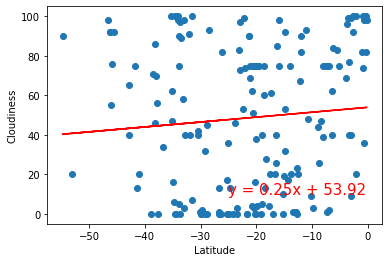

In [75]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH CLOUDS VS LAT.png")
print("A weak positive correlation between latitude and cloudiness in the southern hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and windspeed for northern hemisphere is positive eventhough it's weak.


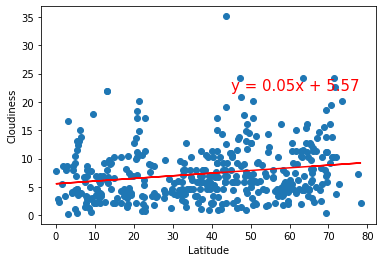

In [76]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH WIND VS LAT.png")
print("The correlation between latitude and windspeed for northern hemisphere is positive eventhough it's weak.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is a weak negative correlation between latitude and wind speed for southern hemisphere.


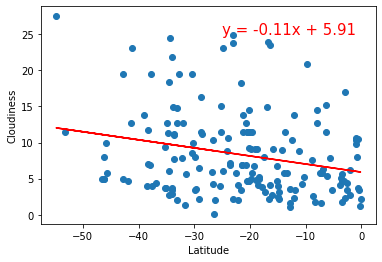

In [77]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH WIND VS LAT.png")
print("There is a weak negative correlation between latitude and wind speed for southern hemisphere.")